Loading the Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the data
df_0 = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\asik_NIR_DIST_3b.csv")

In [3]:
print(df_0.head())

  prov_char country_char           wavenumber     11544     11540     11536  \
0       KAX           ID  ID-KAX-088-2401-001  0.290252  0.290122  0.290044   
1       KBX           ID  ID-KBX-068-2306-003  0.522845  0.522798  0.522826   
2       BBX           ID  ID-BBX-095-2401-004 -0.144108 -0.144008 -0.143893   
3       SUX           ID  ID-SUX-074-2311-001  0.333905  0.333777  0.333785   
4       SUX           ID  ID-SUX-073-2311-001  1.522433  1.521460  1.521133   

      11532     11528     11524     11520  ...      3964      3960      3956  \
0  0.290029  0.290042  0.289978  0.289851  ...  3.558086  3.542757  3.530849   
1  0.522669  0.522414  0.522217  0.522070  ...  3.680422  3.655416  3.629388   
2 -0.143777 -0.143686 -0.143667 -0.143678  ...  3.650478  3.623180  3.614590   
3  0.333700  0.333522  0.333453  0.333446  ...  3.601331  3.566453  3.539593   
4  1.521072  1.521494  1.522300  1.521840  ...  4.103365  4.125110  4.113971   

       3952  tgp_name  dgp_name  fgp_name  c

Selecting Regions of Interest

In [4]:
# Define the regions of interest
regions_of_interest = [
    (4641, 4681), (4867, 5510), (5657, 5826), (7057, 7097),
    (7169, 7209), (8238, 8278)
]

# Extract columns corresponding to the regions of interest
columns_to_focus = []
for start, end in regions_of_interest:
    columns_to_focus.extend([col for col in df_0.columns[4:-7] if start <= float(col) <= end])

# Create a new DataFrame with the selected regions
df_0_selected_regions = df_0[columns_to_focus]

# Combine the selected regions with the target column and other relevant columns
df_0_selected_regions = pd.concat([df_0[['thnoth_name', 'prov_char']], df_0_selected_regions], axis=1)

# Save the DataFrame for further processing
#df_0_selected_regions.to_csv('data/data file 2b/data_1.csv', index=False)


In [5]:
df_0_selected_regions.head()

,thnoth_name,prov_char,4680,4676,4672,4668,4664,4660,4656,4652,...,8276,8272,8268,8264,8260,8256,8252,8248,8244,8240
0,Non-Thai,KAX,1.145221,1.161998,1.183733,1.206279,1.221476,1.219369,1.195433,1.155057,...,0.693094,0.696532,0.699208,0.701041,0.702028,0.702149,0.701310,0.699461,0.696617,0.692720
1,Non-Thai,KBX,1.100158,1.117663,1.140348,1.163641,1.178847,1.175626,1.149462,1.106238,...,0.827193,0.830521,0.833110,0.834886,0.835800,0.835858,0.835008,0.833129,0.830211,0.826278
2,Non-Thai,BBX,0.873460,0.891096,0.914072,0.937998,0.954190,0.951890,0.926066,0.882441,...,0.370219,0.373736,0.376443,0.378311,0.379332,0.379466,0.378665,0.376875,0.374042,0.370139
3,Non-Thai,SUX,1.014767,1.031323,1.052854,1.075045,1.089551,1.086283,1.060706,1.018413,...,0.694977,0.698438,0.701122,0.702996,0.703988,0.704090,0.703278,0.701477,0.698633,0.694729
4,Non-Thai,SUX,1.520511,1.536409,1.557498,1.579159,1.592749,1.588327,1.561828,1.519022,...,1.606612,1.609559,1.611674,1.613343,1.614402,1.614270,1.612957,1.610735,1.607516,1.603303


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define the target variable
target = 'thnoth_name'

# Ensure columns_to_focus are correctly identified
numeric_cols_df_0 = df_0_selected_regions.select_dtypes(include=[np.number]).columns.tolist()
columns_to_focus = numeric_cols_df_0  # Ensure columns are correctly selected

Step-by-Step Implementation for Classifiers Evaluation

In [15]:
# Load the smoothed dataset
df_1dernp_v00 = pd.read_csv('data/data file 2b/data_1_1_der.csv')

Define the Target Variable and Features

In [16]:
# Define the target_v00 variable and feature columns
target_v00 = 'thnoth_name'
features_v00 = df_1dernp_v00.columns.difference(['thnoth_name', 'prov_char'])
X = df_1dernp_v00[features_v00]
y = df_1dernp_v00[target_v00]
groups = df_1dernp_v00['prov_char']

In [17]:
# Encode the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

Support Vector Machine (SVM)

In [19]:
# Standardize the features
scaler = StandardScaler()
X_scaled_svm = scaler.fit_transform(X)

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the SVM classifier
svm = SVC(kernel='rbf', random_state=42)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
y_true_svm2_all = []
y_pred_svm2_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X_scaled_svm, y_encoded, groups):
    X_train, X_test = X_scaled_svm[train_index], X_scaled_svm[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    svm.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = svm.predict(X_test)
    
    # Store the prediction and actual value
    y_true_svm2_all.extend(y_test)
    y_pred_svm2_all.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy = accuracy_score(y_true_svm2_all, y_pred_svm2_all)

print(f'Leave-One-Group-Out CV - Overall Test Accuracy: {overall_accuracy}')

# Generate the classification report for the overall test predictions
report_svm1_logo = classification_report(y_true_svm2_all, y_pred_svm2_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV SVM Model Classification Report")
print(classification_report(y_true_svm2_all, y_pred_svm2_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_svm2_all, y_pred_svm2_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_svm1_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Overall Test Accuracy: 0.8414893617021276
Leave-One-Group-Out CV SVM Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.93      0.74      0.82       470
        Thai       0.78      0.94      0.86       470

    accuracy                           0.84       940
   macro avg       0.86      0.84      0.84       940
weighted avg       0.86      0.84      0.84       940

Confusion Matrix:
          Non-Thai  Thai
Non-Thai       347   123
Thai            26   444
Class: Non-Thai
precision: 0.9302949061662198
recall: 0.7382978723404255
f1-score: 0.8232502965599051
support: 470.0

Class: Thai
precision: 0.783068783068783
recall: 0.9446808510638298
f1-score: 0.8563162970106075
support: 470.0

accuracy: 0.8414893617021276

Class: macro avg
precision: 0.8566818446175014
recall: 0.8414893617021277
f1-score: 0.8397832967852563
support: 940.0

Class: weighted avg
precision: 0.8566818446175014
recall: 0.8414893617021276
f

Random Forest (RF) classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np
import pandas as pd

# Classification and evaluation function using LOGO-CV with detailed metrics
def classify_and_evaluate_logo_cv_detailed(df, columns):
    # Encode target variable
    le = LabelEncoder()
    y = le.fit_transform(df[target])
    
    # Define features
    X = df[columns]
    
    # Initialize the classifier
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    
    # Initialize LOGO-CV
    logo = LeaveOneGroupOut()
    groups = df['prov_char']
    
    # Arrays to store results
    y_true_all = []
    y_pred_all = []
    
    # Perform LOGO-CV
    for train_idx, test_idx in logo.split(X, y, groups=groups):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict and store results
        y_pred = model.predict(X_test)
        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)
    
    # Calculate overall metrics
    overall_accuracy = accuracy_score(y_true_all, y_pred_all)
    precision = precision_score(y_true_all, y_pred_all, average=None)
    recall = recall_score(y_true_all, y_pred_all, average=None)
    f1 = f1_score(y_true_all, y_pred_all, average=None)
    conf_matrix = confusion_matrix(y_true_all, y_pred_all)
    
    # Generate classification report
    report = classification_report(y_true_all, y_pred_all, target_names=le.classes_, output_dict=True)
    
    # Print the results
    print(f'Leave-One-Group-Out CV - Overall Test Accuracy: {overall_accuracy}')
    print("Leave-One-Group-Out CV Random Forest Model Classification Report")
    print(classification_report(y_true_all, y_pred_all, target_names=le.classes_))
    
    # Print the confusion matrix in text format
    conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
    print("Confusion Matrix:")
    print(conf_matrix_df)
    
    # Print the detailed results
    for class_name, metrics in report.items():
        if isinstance(metrics, dict):
            print(f"Class: {class_name}")
            for metric_name, score in metrics.items():
                print(f"{metric_name}: {score}")
        else:
            print(f"{class_name}: {metrics}")
        print()
    
    # Return confusion matrix for presentation
    return conf_matrix

print("LOGO-CV Evaluation for 1-Derivative Spectroscopy:")
conf_matrix_1_derivative_v03 = classify_and_evaluate_logo_cv_detailed(df_1dernp_v00, columns_to_focus)

LOGO-CV Evaluation for 1-Derivative Spectroscopy:
Leave-One-Group-Out CV - Overall Test Accuracy: 0.8021276595744681
Leave-One-Group-Out CV Random Forest Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.80      0.80      0.80       470
        Thai       0.80      0.81      0.80       470

    accuracy                           0.80       940
   macro avg       0.80      0.80      0.80       940
weighted avg       0.80      0.80      0.80       940

Confusion Matrix:
          Non-Thai  Thai
Non-Thai       375    95
Thai            91   379
Class: Non-Thai
precision: 0.8047210300429185
recall: 0.7978723404255319
f1-score: 0.8012820512820513
support: 470.0

Class: Thai
precision: 0.79957805907173
recall: 0.8063829787234043
f1-score: 0.8029661016949152
support: 470.0

accuracy: 0.8021276595744681

Class: macro avg
precision: 0.8021495445573242
recall: 0.8021276595744681
f1-score: 0.8021240764884833
support: 940.0

Class: weighted avg

In [21]:
# Classification and evaluation function using LOGO-CV with detailed metrics
def classify_and_evaluate_logo_cv_detailed(df, columns):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import LeaveOneGroupOut
    from sklearn.preprocessing import LabelEncoder
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
    
    # Encode target variable
    le = LabelEncoder()
    y = le.fit_transform(df[target])
    
    # Define features
    X = df[columns]
    
    # Initialize the classifier
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    
    # Initialize LOGO-CV
    logo = LeaveOneGroupOut()
    groups = df['prov_char']
    
    # Arrays to store results
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    all_y_test = []
    all_y_pred = []
    
    # Perform LOGO-CV
    for train_idx, test_idx in logo.split(X, y, groups=groups):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict and evaluate
        y_pred = model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
        all_y_test.extend(y_test)
        all_y_pred.extend(y_pred)
        
    # Calculate overall metrics
    mean_accuracy = np.mean(accuracies)
    precision = precision_score(all_y_test, all_y_pred, average=None)
    recall = recall_score(all_y_test, all_y_pred, average=None)
    f1 = f1_score(all_y_test, all_y_pred, average=None)
    conf_matrix = confusion_matrix(all_y_test, all_y_pred)
    
    # Print the results
    print(f'Mean Accuracy: {mean_accuracy}')
    print(f'Precision per class: {precision}')
    print(f'Recall per class: {recall}')
    print(f'F1-score per class: {f1}')
    
    # Return confusion matrix for presentation
    return conf_matrix

print("LOGO-CV Evaluation for 1-Derivative Spectroscopy:")
conf_matrix_1_derivative_v03 = classify_and_evaluate_logo_cv_detailed(df_1dernp_v00, columns_to_focus)

LOGO-CV Evaluation for 1-Derivative Spectroscopy:
Mean Accuracy: 0.8545845339928044
Precision per class: [0.80472103 0.79957806]
Recall per class: [0.79787234 0.80638298]
F1-score per class: [0.80128205 0.8029661 ]


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np
import pandas as pd

# Classification and evaluation function using LOGO-CV with detailed metrics
def classify_and_evaluate_logo_cv_detailed(df, columns):
    # Encode target variable
    le = LabelEncoder()
    y = le.fit_transform(df[target])
    
    # Define features
    X = df[columns]
    
    # Initialize the classifier
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    
    # Initialize LOGO-CV
    logo = LeaveOneGroupOut()
    groups = df['prov_char']
    
    # Arrays to store results
    accuracies = []
    y_true_all = []
    y_pred_all = []
    
    # Perform LOGO-CV
    for train_idx, test_idx in logo.split(X, y, groups=groups):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict and store results
        y_pred = model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)
    
    # Calculate overall metrics
    overall_accuracy = np.mean(accuracies)
    precision = precision_score(y_true_all, y_pred_all, average=None)
    recall = recall_score(y_true_all, y_pred_all, average=None)
    f1 = f1_score(y_true_all, y_pred_all, average=None)
    conf_matrix = confusion_matrix(y_true_all, y_pred_all)
    
    # Generate classification report
    report = classification_report(y_true_all, y_pred_all, target_names=le.classes_, output_dict=True)
    
    # Print the results
    print(f'Leave-One-Group-Out CV - Overall Test Accuracy: {overall_accuracy}')
    print("Leave-One-Group-Out CV Random Forest Model Classification Report")
    print(classification_report(y_true_all, y_pred_all, target_names=le.classes_))
    
    # Print the confusion matrix in text format
    conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
    print("Confusion Matrix:")
    print(conf_matrix_df)
    
    # Print the detailed results
    for class_name, metrics in report.items():
        if isinstance(metrics, dict):
            print(f"Class: {class_name}")
            for metric_name, score in metrics.items():
                print(f"{metric_name}: {score}")
        else:
            print(f"{class_name}: {metrics}")
        print()
    
    # Return confusion matrix for presentation
    return conf_matrix

print("LOGO-CV Evaluation for 1-Derivative Spectroscopy:")
conf_matrix_1_derivative_v03 = classify_and_evaluate_logo_cv_detailed(df_1dernp_v00, columns_to_focus)

LOGO-CV Evaluation for 1-Derivative Spectroscopy:
Leave-One-Group-Out CV - Overall Test Accuracy: 0.8545845339928044
Leave-One-Group-Out CV Random Forest Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.80      0.80      0.80       470
        Thai       0.80      0.81      0.80       470

    accuracy                           0.80       940
   macro avg       0.80      0.80      0.80       940
weighted avg       0.80      0.80      0.80       940

Confusion Matrix:
          Non-Thai  Thai
Non-Thai       375    95
Thai            91   379
Class: Non-Thai
precision: 0.8047210300429185
recall: 0.7978723404255319
f1-score: 0.8012820512820513
support: 470.0

Class: Thai
precision: 0.79957805907173
recall: 0.8063829787234043
f1-score: 0.8029661016949152
support: 470.0

accuracy: 0.8021276595744681

Class: macro avg
precision: 0.8021495445573242
recall: 0.8021276595744681
f1-score: 0.8021240764884833
support: 940.0

Class: weighted avg

In [23]:
# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies = []
y_true_rf3_all = []
y_pred_rf3_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    rf.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = rf.predict(X_test)

    accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_rf3_all.extend(y_test)
    y_pred_rf3_all.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy = np.mean(accuracies) #accuracy_score(y_true_rf3_all, y_pred_rf3_all)

print(f'Leave-One-Group-Out CV - Overall Test Accuracy: {overall_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_logo = classification_report(y_true_rf3_all, y_pred_rf3_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV Random Forest Model Classification Report")
print(classification_report(y_true_rf3_all, y_pred_rf3_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_rf3_all, y_pred_rf3_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_rf_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Overall Test Accuracy: 0.8379168223327018
Leave-One-Group-Out CV Random Forest Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.80      0.79      0.80       470
        Thai       0.79      0.80      0.80       470

    accuracy                           0.80       940
   macro avg       0.80      0.80      0.80       940
weighted avg       0.80      0.80      0.80       940

Confusion Matrix:
          Non-Thai  Thai
Non-Thai       372    98
Thai            93   377
Class: Non-Thai
precision: 0.8
recall: 0.7914893617021277
f1-score: 0.7957219251336899
support: 470.0

Class: Thai
precision: 0.7936842105263158
recall: 0.8021276595744681
f1-score: 0.7978835978835979
support: 470.0

accuracy: 0.7968085106382978

Class: macro avg
precision: 0.7968421052631579
recall: 0.7968085106382978
f1-score: 0.7968027615086439
support: 940.0

Class: weighted avg
precision: 0.7968421052631579
recall: 0.7968085106382978
f1-sc

Extra Trees (ET) classifier

In [24]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the Extra Trees classifier
et = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
y_true_et_all = []
y_pred_et_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    et.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = et.predict(X_test)
    
    # Store the prediction and actual value
    y_true_et_all.extend(y_test)
    y_pred_et_all.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy = accuracy_score(y_true_et_all, y_pred_et_all)

print(f'Leave-One-Group-Out CV - Overall Test Accuracy: {overall_accuracy}')

# Generate the classification report for the overall test predictions
report_et_logo = classification_report(y_true_et_all, y_pred_et_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV Extra Trees Model Classification Report")
print(classification_report(y_true_et_all, y_pred_et_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_et_all, y_pred_et_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_et_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Overall Test Accuracy: 0.8095744680851064
Leave-One-Group-Out CV Extra Trees Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.84      0.77      0.80       470
        Thai       0.78      0.85      0.82       470

    accuracy                           0.81       940
   macro avg       0.81      0.81      0.81       940
weighted avg       0.81      0.81      0.81       940

Confusion Matrix:
          Non-Thai  Thai
Non-Thai       360   110
Thai            69   401
Class: Non-Thai
precision: 0.8391608391608392
recall: 0.7659574468085106
f1-score: 0.8008898776418243
support: 470.0

Class: Thai
precision: 0.7847358121330724
recall: 0.8531914893617021
f1-score: 0.817533129459735
support: 470.0

accuracy: 0.8095744680851064

Class: macro avg
precision: 0.8119483256469557
recall: 0.8095744680851064
f1-score: 0.8092115035507796
support: 940.0

Class: weighted avg
precision: 0.8119483256469558
recall: 0.8095744680

k-Nearest Neighbors (kNN)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the kNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
y_true_knn_all = []
y_pred_knn_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = knn.predict(X_test)
    
    # Store the prediction and actual value
    y_true_knn_all.extend(y_test)
    y_pred_knn_all.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy = accuracy_score(y_true_knn_all, y_pred_knn_all)

print(f'Leave-One-Group-Out CV - Overall Test Accuracy: {overall_accuracy}')

# Generate the classification report for the overall test predictions
report_knn_logo = classification_report(y_true_knn_all, y_pred_knn_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV kNN Model Classification Report")
print(classification_report(y_true_knn_all, y_pred_knn_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_knn_all, y_pred_knn_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_knn_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Overall Test Accuracy: 0.5893617021276596
Leave-One-Group-Out CV kNN Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.69      0.32      0.44       470
        Thai       0.56      0.86      0.68       470

    accuracy                           0.59       940
   macro avg       0.63      0.59      0.56       940
weighted avg       0.63      0.59      0.56       940

Confusion Matrix:
          Non-Thai  Thai
Non-Thai       150   320
Thai            66   404
Class: Non-Thai
precision: 0.6944444444444444
recall: 0.3191489361702128
f1-score: 0.43731778425655976
support: 470.0

Class: Thai
precision: 0.5580110497237569
recall: 0.8595744680851064
f1-score: 0.6767169179229481
support: 470.0

accuracy: 0.5893617021276596

Class: macro avg
precision: 0.6262277470841007
recall: 0.5893617021276596
f1-score: 0.5570173510897539
support: 940.0

Class: weighted avg
precision: 0.6262277470841006
recall: 0.5893617021276596

In [26]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Standardize the features after SNV transformation
scaler = StandardScaler()
X_scaled_knn = scaler.fit_transform(X)

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the kNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
y_true_knn_all = []
y_pred_knn_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X_scaled_knn, y_encoded, groups):
    X_train, X_test = X_scaled_knn[train_index], X_scaled_knn[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = knn.predict(X_test)
    
    # Store the prediction and actual value
    y_true_knn_all.extend(y_test)
    y_pred_knn_all.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy = accuracy_score(y_true_knn_all, y_pred_knn_all)

print(f'Leave-One-Group-Out CV - Overall Test Accuracy: {overall_accuracy}')

# Generate the classification report for the overall test predictions
report_knn_logo = classification_report(y_true_knn_all, y_pred_knn_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV kNN Model Classification Report")
print(classification_report(y_true_knn_all, y_pred_knn_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_knn_all, y_pred_knn_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_knn_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Overall Test Accuracy: 0.6957446808510638
Leave-One-Group-Out CV kNN Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.90      0.44      0.59       470
        Thai       0.63      0.95      0.76       470

    accuracy                           0.70       940
   macro avg       0.76      0.70      0.67       940
weighted avg       0.76      0.70      0.67       940

Confusion Matrix:
          Non-Thai  Thai
Non-Thai       208   262
Thai            24   446
Class: Non-Thai
precision: 0.896551724137931
recall: 0.4425531914893617
f1-score: 0.5925925925925926
support: 470.0

Class: Thai
precision: 0.6299435028248588
recall: 0.948936170212766
f1-score: 0.7572156196943973
support: 470.0

accuracy: 0.6957446808510638

Class: macro avg
precision: 0.7632476134813949
recall: 0.6957446808510639
f1-score: 0.6749041061434949
support: 940.0

Class: weighted avg
precision: 0.7632476134813949
recall: 0.6957446808510638
f1

Gradient Boosting Classifier (GBC)

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
model_gbc = GradientBoostingClassifier(random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies_gbc = []
y_true_all_gbc = []
y_pred_all_gbc = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    model_gbc.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = model_gbc.predict(X_test)
    
    # Calculate and store the accuracy
    accuracies_gbc.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual values
    y_true_all_gbc.extend(y_test)
    y_pred_all_gbc.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy_gbc = accuracy_score(y_true_all_gbc, y_pred_all_gbc)

print(f'Leave-One-Group-Out CV - Average Test Accuracy: {overall_accuracy_gbc}')
print("Leave-One-Group-Out CV GBC Model Classification Report")
report_gbc_logo = classification_report(y_true_all_gbc, y_pred_all_gbc, target_names=le.classes_, output_dict=True)
print(classification_report(y_true_all_gbc, y_pred_all_gbc, target_names=le.classes_))

# Generate and display the confusion matrix
cm_logo_gbc = confusion_matrix(y_true_all_gbc, y_pred_all_gbc)
df_cm_gbc = pd.DataFrame(cm_logo_gbc, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(df_cm_gbc)

# Display the detailed results
for class_name, metrics in report_gbc_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Average Test Accuracy: 0.8031914893617021
Leave-One-Group-Out CV GBC Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.84      0.74      0.79       470
        Thai       0.77      0.86      0.81       470

    accuracy                           0.80       940
   macro avg       0.81      0.80      0.80       940
weighted avg       0.81      0.80      0.80       940

Confusion Matrix:
          Non-Thai  Thai
Non-Thai       350   120
Thai            65   405
Class: Non-Thai
precision: 0.8433734939759037
recall: 0.7446808510638298
f1-score: 0.7909604519774012
support: 470.0

Class: Thai
precision: 0.7714285714285715
recall: 0.8617021276595744
f1-score: 0.8140703517587939
support: 470.0

accuracy: 0.8031914893617021

Class: macro avg
precision: 0.8074010327022376
recall: 0.803191489361702
f1-score: 0.8025154018680976
support: 940.0

Class: weighted avg
precision: 0.8074010327022376
recall: 0.8031914893617021
f

LightGBM (LGBM) Classifier

In [28]:
import lightgbm as lgb
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the LightGBM Classifier
model_lgbm = lgb.LGBMClassifier(random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies_lgbm = []
y_true_all_lgbm = []
y_pred_all_lgbm = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    model_lgbm.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = model_lgbm.predict(X_test)
    
    # Calculate and store the accuracy
    accuracies_lgbm.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual values
    y_true_all_lgbm.extend(y_test)
    y_pred_all_lgbm.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy_lgbm = accuracy_score(y_true_all_lgbm, y_pred_all_lgbm)

print(f'Leave-One-Group-Out CV - Average Test Accuracy: {overall_accuracy_lgbm}')
print("Leave-One-Group-Out CV LGBM Model Classification Report")
report_lgbm_logo = classification_report(y_true_all_lgbm, y_pred_all_lgbm, target_names=le.classes_, output_dict=True)
print(classification_report(y_true_all_lgbm, y_pred_all_lgbm, target_names=le.classes_))

# Generate and display the confusion matrix
cm_logo_lgbm = confusion_matrix(y_true_all_lgbm, y_pred_all_lgbm)
df_cm_lgbm = pd.DataFrame(cm_logo_lgbm, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(df_cm_lgbm)

# Display the detailed results
for class_name, metrics in report_lgbm_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


[LightGBM] [Info] Number of positive: 470, number of negative: 425
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004332 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 61960
[LightGBM] [Info] Number of data points in the train set: 895, number of used features: 243
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.525140 -> initscore=0.100644
[LightGBM] [Info] Start training from score 0.100644
[LightGBM] [Info] Number of positive: 457, number of negative: 470
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 61960
[LightGBM] [Info] Number of data points in the train set: 927, number of used features: 243
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492988 -> initscore=-0.028049
[LightGBM] [Info] Start training from score -0.028049
[LightGBM] [Info] Numb

Linear Discriminant Analysis (LDA) classifier

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the LDA Classifier
model_lda = LinearDiscriminantAnalysis()

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies_lda = []
y_true_all_ldar = []
y_pred_all_ldar = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    model_lda.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = model_lda.predict(X_test)
    
    # Calculate and store the accuracy
    accuracies_lda.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual values
    y_true_all_ldar.extend(y_test)
    y_pred_all_ldar.extend(y_test_pred)

# Reverse the predicted classes
y_pred_all_ldar_reversed = [1 - y for y in y_pred_all_ldar]

# Calculate the overall accuracy for the reversed predictions
overall_accuracy_lda_reversed = accuracy_score(y_true_all_ldar, y_pred_all_ldar_reversed)

print(f'Leave-One-Group-Out CV - Average Test Accuracy (Reversed Classes): {overall_accuracy_lda_reversed}')
print("Leave-One-Group-Out CV LDA Model Classification Report (Reversed Classes)")
report_lda_logo_reversed = classification_report(y_true_all_ldar, y_pred_all_ldar_reversed, target_names=le.classes_, output_dict=True)
print(classification_report(y_true_all_ldar, y_pred_all_ldar_reversed, target_names=le.classes_))

# Generate and display the confusion matrix for the reversed predictions
cm_logo_lda_reversed = confusion_matrix(y_true_all_ldar, y_pred_all_ldar_reversed)
df_cm_lda_reversed = pd.DataFrame(cm_logo_lda_reversed, index=le.classes_, columns=le.classes_)
print("Confusion Matrix (Reversed Classes):")
print(df_cm_lda_reversed)

# Display the detailed results for the reversed predictions
for class_name, metrics in report_lda_logo_reversed.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Average Test Accuracy (Reversed Classes): 0.8776595744680851
Leave-One-Group-Out CV LDA Model Classification Report (Reversed Classes)
              precision    recall  f1-score   support

    Non-Thai       0.90      0.85      0.87       470
        Thai       0.86      0.90      0.88       470

    accuracy                           0.88       940
   macro avg       0.88      0.88      0.88       940
weighted avg       0.88      0.88      0.88       940

Confusion Matrix (Reversed Classes):
          Non-Thai  Thai
Non-Thai       400    70
Thai            45   425
Class: Non-Thai
precision: 0.898876404494382
recall: 0.851063829787234
f1-score: 0.8743169398907104
support: 470.0

Class: Thai
precision: 0.8585858585858586
recall: 0.9042553191489362
f1-score: 0.8808290155440415
support: 470.0

accuracy: 0.8776595744680851

Class: macro avg
precision: 0.8787311315401203
recall: 0.8776595744680851
f1-score: 0.877572977717376
support: 940.0

Class: weighted avg
pre

Logistic Regression classifier

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Initialize Logistic Regression model with a different solver
logreg_model = LogisticRegression(random_state=42, max_iter=10000, solver='liblinear')

# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Initialize lists to store results
test_accuracies_logreg = []
y_true_all_logreg = []
y_pred_all_logreg = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_scaled, y, groups):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    logreg_model.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = logreg_model.predict(X_test)
    
    # Calculate and store test accuracies
    test_accuracies_logreg.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all_logreg.extend(y_test)
    y_pred_all_logreg.extend(y_test_pred)

# Flip the predictions
y_pred_lg_flipped = ['Non-Thai' if pred == 'Thai' else 'Thai' for pred in y_pred_all_logreg]

# Generate the classification report for the flipped predictions
report_logreg_flipped = classification_report(y_true_all_logreg, y_pred_lg_flipped, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV Logistic Regression Model (Flipped) Classification Report")
print(classification_report(y_true_all_logreg, y_pred_lg_flipped, target_names=le.classes_))

# Generate and display the confusion matrix for the flipped predictions
cm_logreg_flipped = confusion_matrix(y_true_all_logreg, y_pred_lg_flipped)
df_cm_logreg_flipped = pd.DataFrame(cm_logreg_flipped, index=le.classes_, columns=le.classes_)
print("Confusion Matrix (Flipped):")
print(df_cm_logreg_flipped)

# Display the detailed results for the flipped predictions
for class_name, metrics in report_logreg_flipped.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV Logistic Regression Model (Flipped) Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.92      0.88      0.90       470
        Thai       0.89      0.93      0.91       470

    accuracy                           0.90       940
   macro avg       0.90      0.90      0.90       940
weighted avg       0.90      0.90      0.90       940

Confusion Matrix (Flipped):
          Non-Thai  Thai
Non-Thai       415    55
Thai            35   435
Class: Non-Thai
precision: 0.9222222222222223
recall: 0.8829787234042553
f1-score: 0.9021739130434783
support: 470.0

Class: Thai
precision: 0.8877551020408163
recall: 0.925531914893617
f1-score: 0.90625
support: 470.0

accuracy: 0.9042553191489362

Class: macro avg
precision: 0.9049886621315193
recall: 0.9042553191489362
f1-score: 0.9042119565217391
support: 940.0

Class: weighted avg
precision: 0.9049886621315193
recall: 0.9042553191489362
f1-score: 0.9042119565217391
support: 940.0

Classification Report

In [31]:
from sklearn.metrics import classification_report

# Assuming you have these classification reports stored
# classification_report_rf = ...
# classification_report_svm = ...
# classification_report_et = ...
# classification_report_knn = ...
# classification_report_gbc = ...
# classification_report_lgbm = ...
# classification_report_lda = ...
# classification_report_logreg = ...

# Function to display classification report
def display_classification_report(report, model_name):
    print(f"Classification Report for {model_name}")
    for label, metrics in report.items():
        if isinstance(metrics, dict):
            print(f"Class: {label}")
            for metric_name, score in metrics.items():
                print(f"{metric_name}: {score}")
        else:
            print(f"{label}: {metrics}")
        print()

# Call the function for each classifier
display_classification_report(report_rf_logo, "Random Forest")
display_classification_report(report_svm1_logo, "SVM")
display_classification_report(report_et_logo, "Extra Trees")
display_classification_report(report_knn_logo, "k-Nearest Neighbors")
display_classification_report(report_gbc_logo, "Gradient Boosting Classifier")
display_classification_report(report_lgbm_logo, "LightGBM")
display_classification_report(report_lda_logo_reversed, "Linear Discriminant Analysis")
display_classification_report(report_logreg_flipped, "Logistic Regression")


Classification Report for Random Forest
Class: Non-Thai
precision: 0.8
recall: 0.7914893617021277
f1-score: 0.7957219251336899
support: 470.0

Class: Thai
precision: 0.7936842105263158
recall: 0.8021276595744681
f1-score: 0.7978835978835979
support: 470.0

accuracy: 0.7968085106382978

Class: macro avg
precision: 0.7968421052631579
recall: 0.7968085106382978
f1-score: 0.7968027615086439
support: 940.0

Class: weighted avg
precision: 0.7968421052631579
recall: 0.7968085106382978
f1-score: 0.7968027615086438
support: 940.0

Classification Report for SVM
Class: Non-Thai
precision: 0.9302949061662198
recall: 0.7382978723404255
f1-score: 0.8232502965599051
support: 470.0

Class: Thai
precision: 0.783068783068783
recall: 0.9446808510638298
f1-score: 0.8563162970106075
support: 470.0

accuracy: 0.8414893617021276

Class: macro avg
precision: 0.8566818446175014
recall: 0.8414893617021277
f1-score: 0.8397832967852563
support: 940.0

Class: weighted avg
precision: 0.8566818446175014
recall: 0.84

ConfusionMatrixDisplay

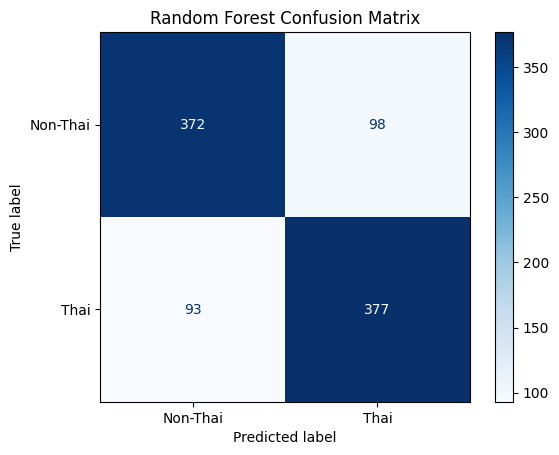

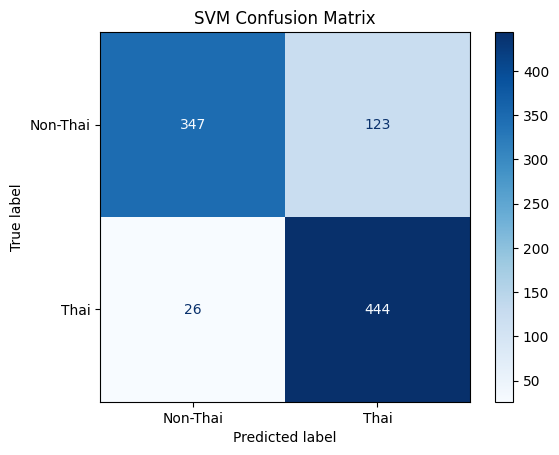

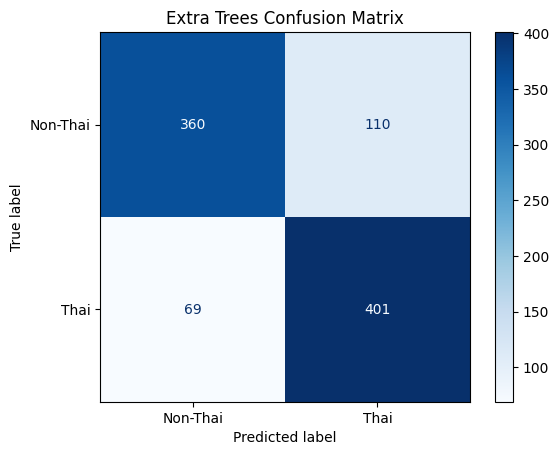

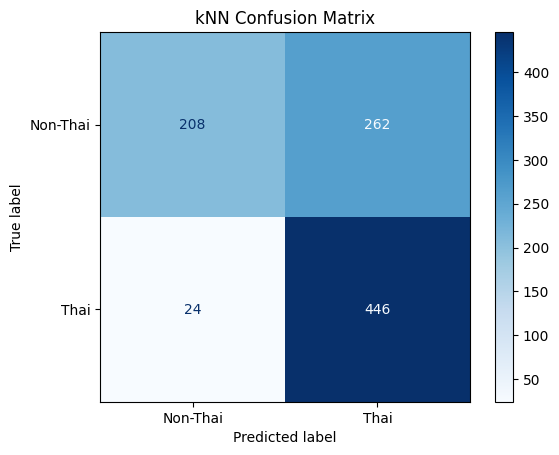

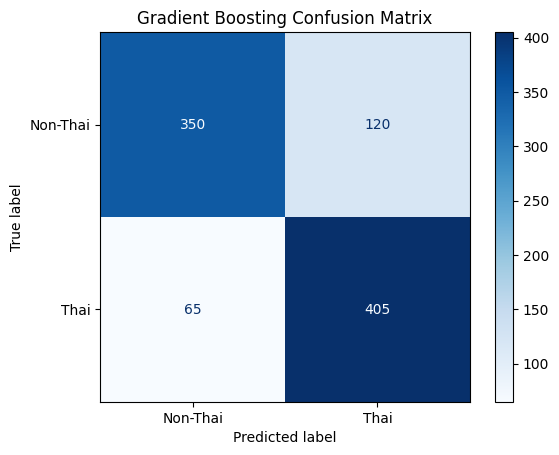

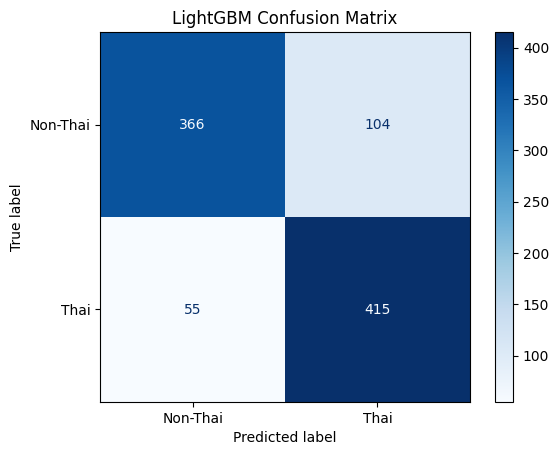

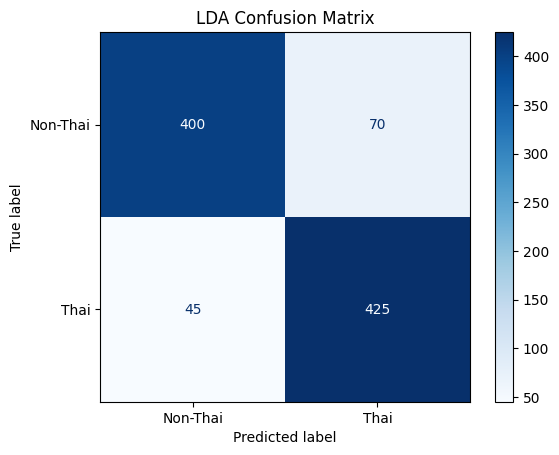

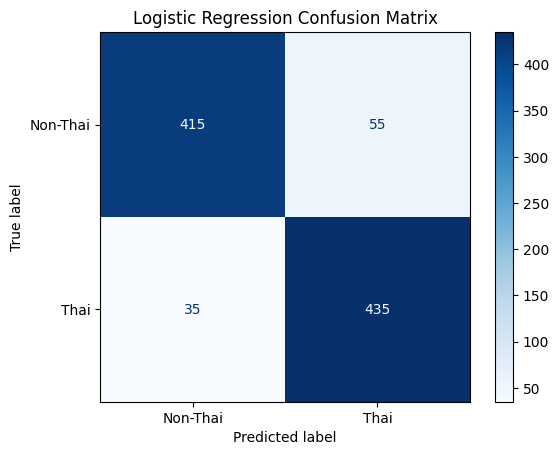

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have the true labels and predictions for each classifier stored in the following variables:
# y_true_rf, y_pred_rf
# y_true_svm, y_pred_svm
# y_true_et, y_pred_et
# y_true_knn, y_pred_knn
# y_true_gbc, y_pred_gbc
# y_true_lgbm, y_pred_lgbm
# y_true_lda, y_pred_lda
# y_true_logreg, y_pred_logreg

# y_true_rf2_all, y_pred_rf2_all
# y_true_svm2_all,  y_pred_svm2_all
# y_true_et_all, y_pred_et_all
# y_true_knn_all, y_pred_knn_all
# y_true_all_gbc, y_pred_all_gbc
# y_true_all_lgbm, y_pred_all_lgbm
# y_true_all_ldar, y_pred_all_ldar_reversed
# y_true_all_logreg, y_pred_lg_flipped

# Define the class labels
class_labels = le.classes_

# Function to display confusion matrix
def display_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Display confusion matrices for each classifier
display_confusion_matrix(y_true_rf3_all, y_pred_rf3_all, 'Random Forest Confusion Matrix')
display_confusion_matrix(y_true_svm2_all,  y_pred_svm2_all, 'SVM Confusion Matrix')
display_confusion_matrix(y_true_et_all, y_pred_et_all, 'Extra Trees Confusion Matrix')
display_confusion_matrix(y_true_knn_all, y_pred_knn_all, 'kNN Confusion Matrix')
display_confusion_matrix(y_true_all_gbc, y_pred_all_gbc, 'Gradient Boosting Confusion Matrix')
display_confusion_matrix(y_true_all_lgbm, y_pred_all_lgbm, 'LightGBM Confusion Matrix')
display_confusion_matrix(y_true_all_ldar, y_pred_all_ldar_reversed, 'LDA Confusion Matrix')
display_confusion_matrix(y_true_all_logreg, y_pred_lg_flipped, 'Logistic Regression Confusion Matrix')


Displaying Confusion Matrices as Text Tables

In [34]:
# Function to display confusion matrix as a text table
def display_confusion_matrix_text(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)
    print(title)
    print(df_cm)
    print()

# Display confusion matrices for each classifier as text tables
display_confusion_matrix_text(y_true_rf3_all, y_pred_rf3_all, 'Random Forest Confusion Matrix')
display_confusion_matrix_text(y_true_svm2_all,  y_pred_svm2_all, 'SVM Confusion Matrix')
display_confusion_matrix_text(y_true_et_all, y_pred_et_all, 'Extra Trees Confusion Matrix')
display_confusion_matrix_text(y_true_knn_all, y_pred_knn_all, 'kNN Confusion Matrix')
display_confusion_matrix_text(y_true_all_gbc, y_pred_all_gbc, 'Gradient Boosting Confusion Matrix')
display_confusion_matrix_text(y_true_all_lgbm, y_pred_all_lgbm, 'LightGBM Confusion Matrix')
display_confusion_matrix_text(y_true_all_ldar, y_pred_all_ldar_reversed, 'LDA Confusion Matrix')
display_confusion_matrix_text(y_true_all_logreg, y_pred_lg_flipped, 'Logistic Regression Confusion Matrix')


Random Forest Confusion Matrix
          Non-Thai  Thai
Non-Thai       372    98
Thai            93   377

SVM Confusion Matrix
          Non-Thai  Thai
Non-Thai       347   123
Thai            26   444

Extra Trees Confusion Matrix
          Non-Thai  Thai
Non-Thai       360   110
Thai            69   401

kNN Confusion Matrix
          Non-Thai  Thai
Non-Thai       208   262
Thai            24   446

Gradient Boosting Confusion Matrix
          Non-Thai  Thai
Non-Thai       350   120
Thai            65   405

LightGBM Confusion Matrix
          Non-Thai  Thai
Non-Thai       366   104
Thai            55   415

LDA Confusion Matrix
          Non-Thai  Thai
Non-Thai       400    70
Thai            45   425

Logistic Regression Confusion Matrix
          Non-Thai  Thai
Non-Thai       415    55
Thai            35   435



IMPORTANT FEATURES

    Feature  Importance
219    7084    0.026960
218    7080    0.022292
36     4972    0.019479
101    5232    0.016437
134    5364    0.015190
..      ...         ...
231    7204    0.001078
190    5736    0.001077
124    5324    0.001044
200    5776    0.001010
82     5156    0.000940

[243 rows x 2 columns]


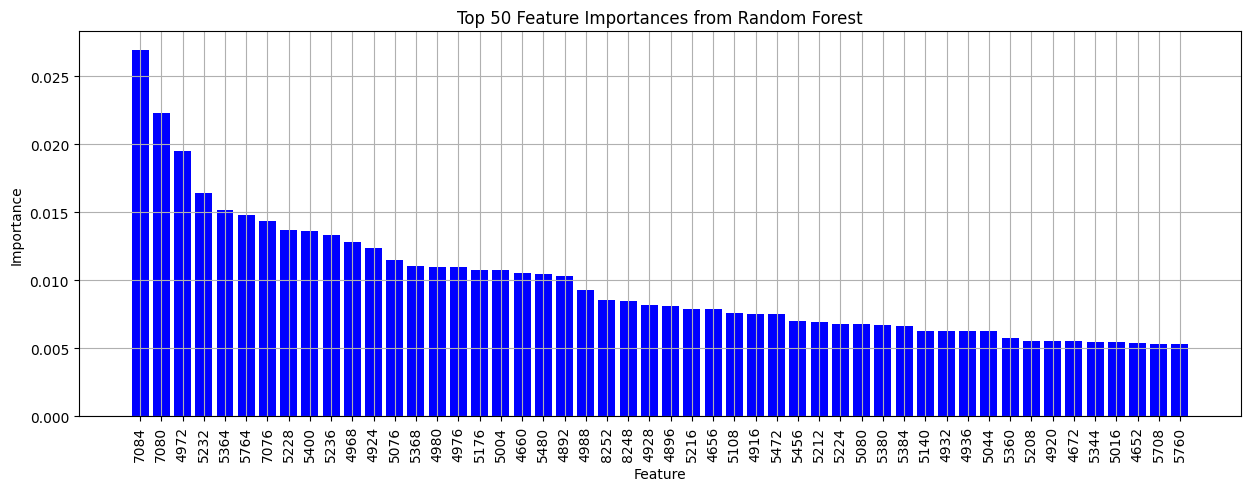

In [35]:
# Extract feature importances
rf_importances = rf.feature_importances_

# Create a DataFrame for feature importances
rf_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_importances
})

# Sort by importance
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(rf_importance_df)

# Plot the feature importances
plt.figure(figsize=(15, 5))
plt.bar(rf_importance_df['Feature'][:50], rf_importance_df['Importance'][:50], color='blue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 50 Feature Importances from Random Forest')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

    Feature  Importance
36     4972    0.013670
100    5228    0.012967
218    7080    0.010150
101    5232    0.009963
102    5236    0.009062
..      ...         ...
212    5824    0.001926
159    5464    0.001834
201    5780    0.001823
225    7180    0.001761
206    5800    0.001394

[243 rows x 2 columns]


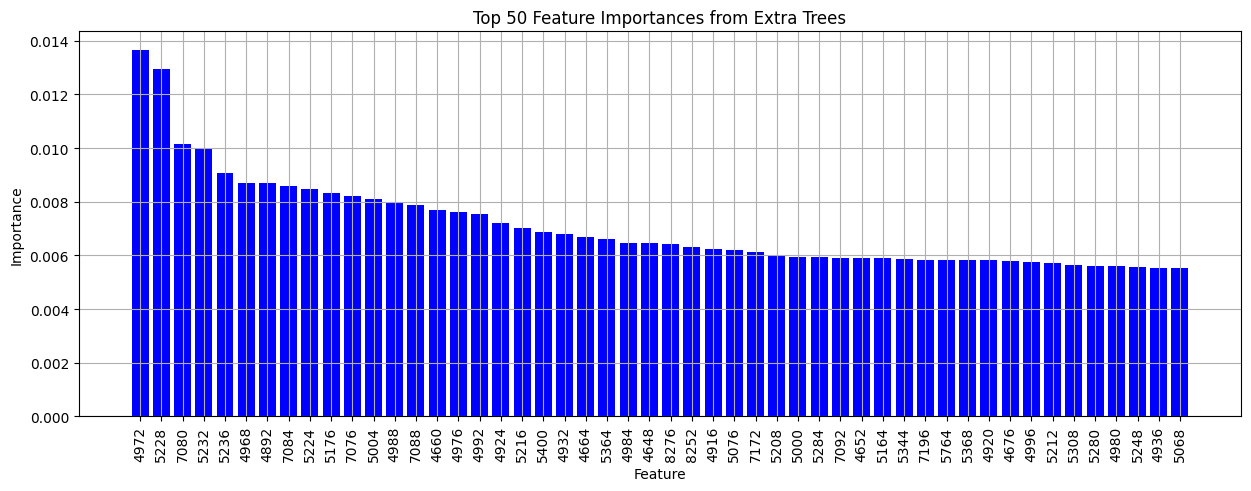

In [36]:
# Extract feature importances
et_importances = et.feature_importances_

# Create a DataFrame for feature importances
et_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': et_importances
})

# Sort by importance
et_importance_df = et_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(et_importance_df)

# Plot the feature importances
plt.figure(figsize=(15, 5))
plt.bar(et_importance_df['Feature'][:50], et_importance_df['Importance'][:50], color='blue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 50 Feature Importances from Extra Trees')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


    Feature  Importance
219    7084    0.094059
62     5076    0.049433
134    5364    0.048262
197    5764    0.046286
101    5232    0.044744
..      ...         ...
227    7188    0.000000
233    8240    0.000000
232    7208    0.000000
231    7204    0.000000
237    8256    0.000000

[243 rows x 2 columns]


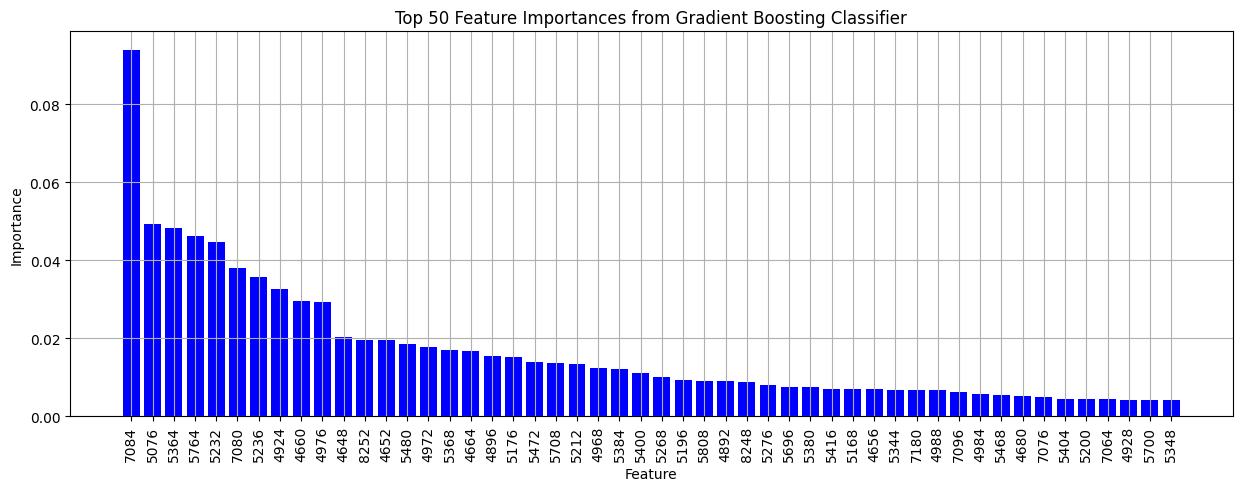

In [37]:
# Extract feature importances
gbc_importances = model_gbc.feature_importances_

# Create a DataFrame for feature importances
gbc_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gbc_importances
})

# Sort by importance
gbc_importance_df = gbc_importance_df

# Sort by importance
gbc_importance_df = gbc_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(gbc_importance_df)

# Plot the feature importances
plt.figure(figsize=(15, 5))
plt.bar(gbc_importance_df['Feature'][:50], gbc_importance_df['Importance'][:50], color='blue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 50 Feature Importances from Gradient Boosting Classifier')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

    Feature  Importance
236    8252          60
218    7080          52
1      4648          50
219    7084          50
4      4660          49
..      ...         ...
48     5020           1
46     5012           1
14     4884           1
65     5088           1
116    5292           1

[243 rows x 2 columns]


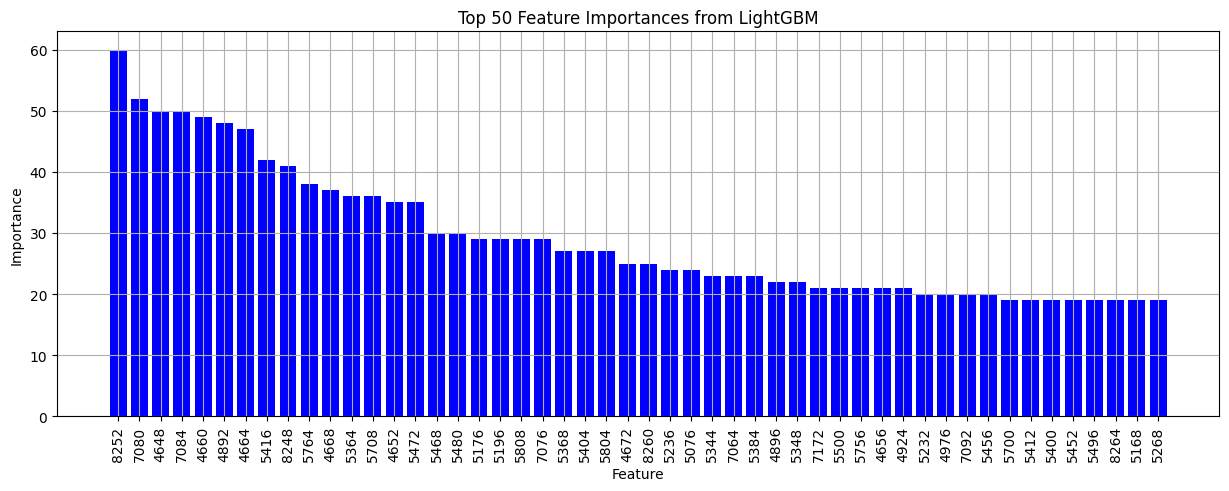

In [38]:
# Extract feature importances
lgbm_importances = model_lgbm.feature_importances_

# Create a DataFrame for feature importances
lgbm_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': lgbm_importances
})

# Sort by importance
lgbm_importance_df = lgbm_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(lgbm_importance_df)

# Plot the feature importances
plt.figure(figsize=(15, 5))
plt.bar(lgbm_importance_df['Feature'][:50], lgbm_importance_df['Importance'][:50], color='blue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 50 Feature Importances from LightGBM')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

    Feature       Loading   abs_loading
142    5396  2.903753e+06  2.903753e+06
141    5392 -2.886646e+06  2.886646e+06
140    5388  2.752740e+06  2.752740e+06
143    5400 -2.752410e+06  2.752410e+06
139    5384 -2.541250e+06  2.541250e+06
..      ...           ...           ...
212    5824  9.250137e+02  9.250137e+02
171    5660  8.974774e+02  8.974774e+02
10     4868 -6.745111e+02  6.745111e+02
202    5784 -1.218641e+02  1.218641e+02
203    5788  7.666231e+00  7.666231e+00

[243 rows x 3 columns]


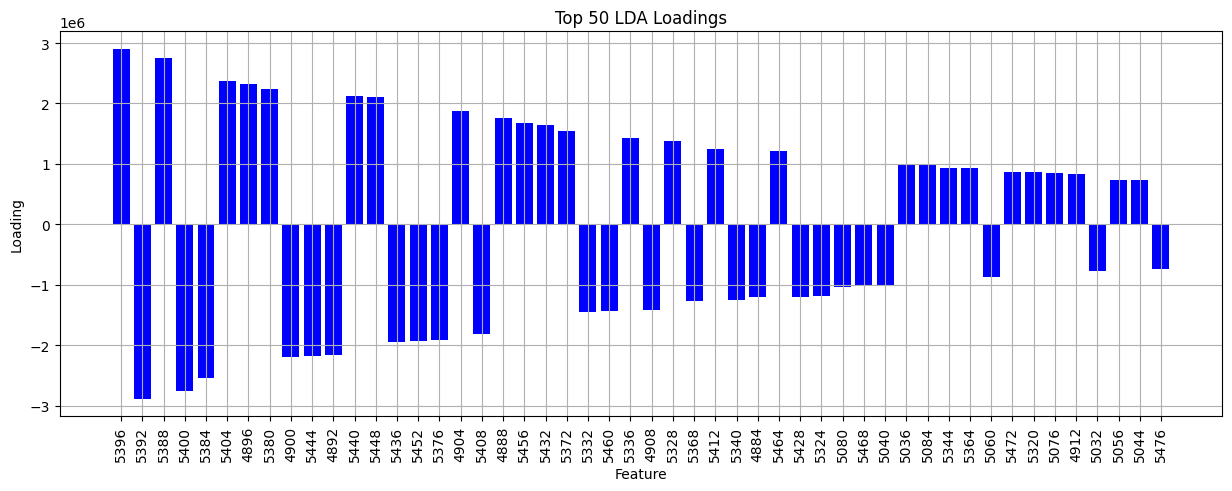

In [39]:
# Extract LDA loadings
lda_loadings = model_lda.scalings_

# Create a DataFrame for LDA loadings
lda_loadings_df = pd.DataFrame({
    'Feature': X.columns,
    'Loading': lda_loadings.flatten()
})

# Sort by loading magnitude
lda_loadings_df['abs_loading'] = lda_loadings_df['Loading'].abs()
lda_loadings_df = lda_loadings_df.sort_values(by='abs_loading', ascending=False)

# Display the top features
print(lda_loadings_df)

# Plot the LDA loadings
plt.figure(figsize=(15, 5))
plt.bar(lda_loadings_df['Feature'][:50], lda_loadings_df['Loading'][:50], color='blue')
plt.xlabel('Feature')
plt.ylabel('Loading')
plt.title('Top 50 LDA Loadings')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


    Feature  Coefficient  abs_coef
169    5504     0.331100  0.331100
130    5348     0.279004  0.279004
40     4988    -0.263618  0.263618
129    5344     0.260038  0.260038
20     4908    -0.242853  0.242853
..      ...          ...       ...
194    5752     0.002325  0.002325
182    5704    -0.002183  0.002183
178    5688    -0.002081  0.002081
209    5812     0.001141  0.001141
108    5260    -0.000897  0.000897

[243 rows x 3 columns]


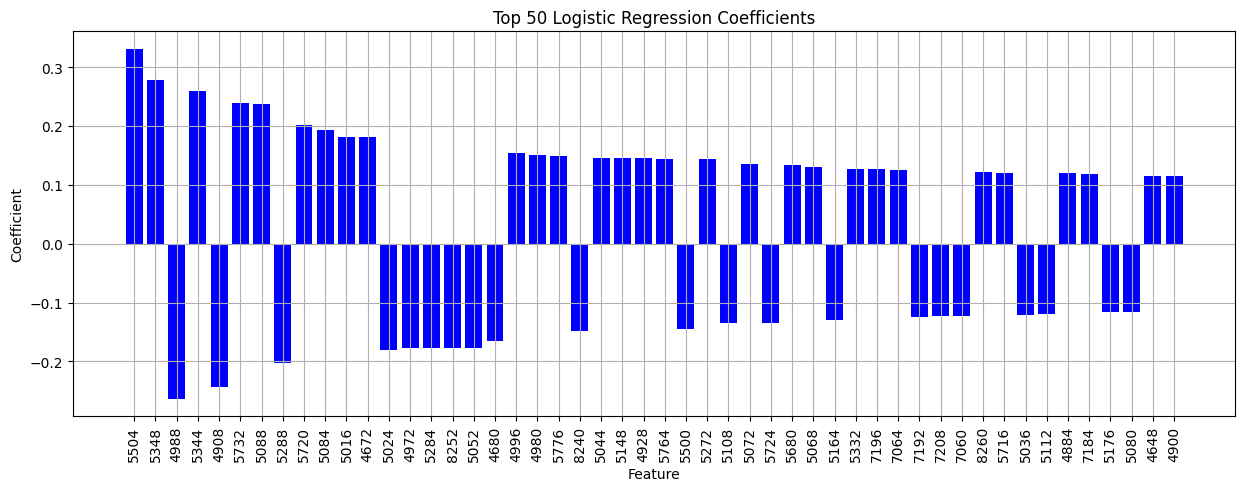

In [40]:
# Extract Logistic Regression coefficients
logreg_coefs = logreg_model.coef_.flatten()

# Create a DataFrame for Logistic Regression coefficients
logreg_coefs_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg_coefs
})

# Sort by coefficient magnitude
logreg_coefs_df['abs_coef'] = logreg_coefs_df['Coefficient'].abs()
logreg_coefs_df = logreg_coefs_df.sort_values(by='abs_coef', ascending=False)

# Display the top features
print(logreg_coefs_df)

# Plot the Logistic Regression coefficients
plt.figure(figsize=(15, 5))
plt.bar(logreg_coefs_df['Feature'][:50], logreg_coefs_df['Coefficient'][:50], color='blue')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Top 50 Logistic Regression Coefficients')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [41]:
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the SVM classifier
svm = SVC(kernel='rbf', random_state=42)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
y_true_svm_all = []
y_pred_svm_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X_scaled, y_encoded, groups):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    svm.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = svm.predict(X_test)
    
    # Store the prediction and actual value
    y_true_svm_all.extend(y_test)
    y_pred_svm_all.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy = accuracy_score(y_true_svm_all, y_pred_svm_all)

print(f'Leave-One-Group-Out CV - Overall Test Accuracy: {overall_accuracy}')

# Generate the classification report for the overall test predictions
report_svm_logo = classification_report(y_true_svm_all, y_pred_svm_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV SVM Model Classification Report")
print(classification_report(y_true_svm_all, y_pred_svm_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_svm_all, y_pred_svm_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)


Leave-One-Group-Out CV - Overall Test Accuracy: 0.8414893617021276
Leave-One-Group-Out CV SVM Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.93      0.74      0.82       470
        Thai       0.78      0.94      0.86       470

    accuracy                           0.84       940
   macro avg       0.86      0.84      0.84       940
weighted avg       0.86      0.84      0.84       940

Confusion Matrix:
          Non-Thai  Thai
Non-Thai       347   123
Thai            26   444


In [42]:
from sklearn.inspection import permutation_importance

# Calculate permutation importances on the test set
perm_importance = permutation_importance(svm, X_scaled, y_encoded, n_repeats=10, random_state=42, n_jobs=-1)

# Create a DataFrame for permutation importances
svm_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
})

# Sort by importance
svm_importance_df = svm_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(svm_importance_df)


    Feature  Importance
213    7060    0.003298
242    8276    0.002872
232    7208    0.002766
223    7172    0.002766
194    5752    0.002660
..      ...         ...
19     4904   -0.001489
225    7180   -0.001596
143    5400   -0.001596
14     4884   -0.001702
208    5808   -0.002021

[243 rows x 2 columns]


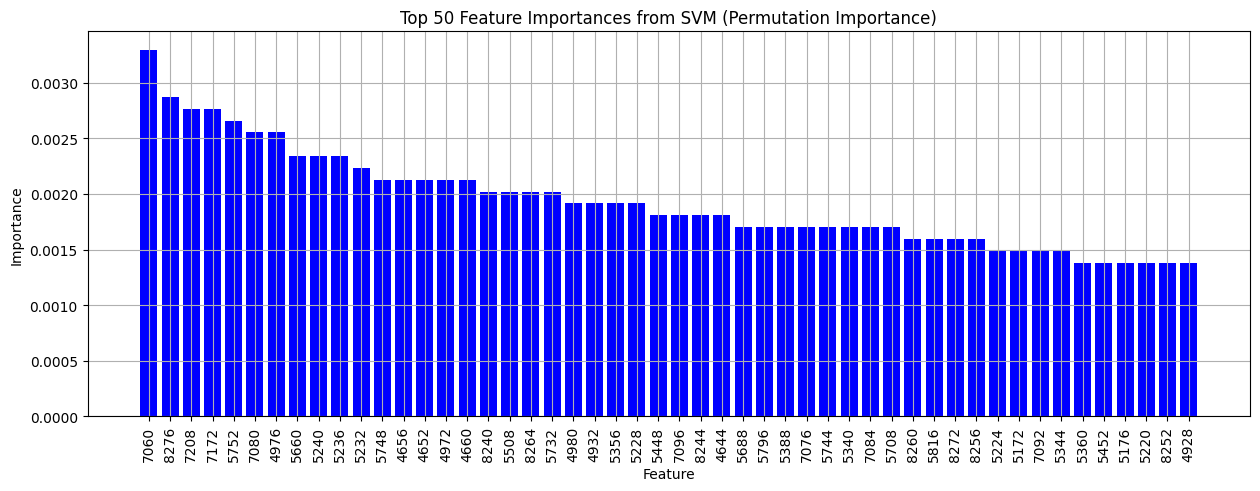

In [43]:
import matplotlib.pyplot as plt

# Plot the feature importances
plt.figure(figsize=(15, 5))
plt.bar(svm_importance_df['Feature'][:50], svm_importance_df['Importance'][:50], color='blue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 50 Feature Importances from SVM (Permutation Importance)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()
